<a href="https://colab.research.google.com/github/jgkorman/Python-Projects/blob/main/Webscraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Assignment Directions**

1. Find an appropriate non-fiction social science book on Project Gutenberg's websiteLinks to an external site.. Scrape the plain text for this book, and construct a wordcloud of the corresponding "documents" contained within that book. The "documents" in this case can be individual lines of text from that book, quasi-sentences as defined via the scan function in the lab, or any other approach you deem appropriate based upon the constraint that wordclouds require multiple documents. Be sure to give some mention of your document choice, and the potential strengths and weaknesses of that choice. Then, also be sure to interpret your resultant wordcloud alongside a discussion of any words/tokens that you feel would ideally be omitted within more polished versions of that wordcloud in the future. Note: you do not have to actually remove these latter words/tokens for this assignment.

2. Choose a Wikipedia page for one of the American abolitionist organizations listed hereLinks to an external site.. Scrape the chosen organization's Wikipedia page, retaining only the page's primary paragraph content (i.e., after removing all HTML from each paragraph, and after omitting any paragraph content entries at the very start/end of your paragraph list that do not appear to be actual text content). Using the remaining paragraphs as your "documents", construct an appropriate wordcloud and include/interpret this wordcloud in your write-up. Beyond the social science insights offered by your wordcloud, be sure to highlight any retained words/tokens that you feel future work should ideally remove before that wordloud would be of publishable quality. Note: you do not have to actually remove these latter words/tokens for this assignment.



In [108]:
!pip install requests-html
import requests_html
from requests_html import HTMLSession
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#**Question 1**

In [109]:
# reading in the text file from project gutenberg site
fname = "https://www.gutenberg.org/files/1840/1840-0.txt"
book_text = pd.read_csv(fname, encoding_errors='ignore', on_bad_lines='skip')
book_text

,The Project Gutenberg EBook of The Financier,by Theodore Dreiser
0,This eBook is for the use of anyone anywhere a...,NaN
1,almost no restrictions whatsoever. You may co...,give it away or
2,re-use it under the terms of the Project Guten...,NaN
3,with this eBook or online at www.gutenberg.org,NaN
4,Title: The Financier,NaN
...,...,...
13451,Most people start at our Web site which has th...,NaN
13452,facility: www.gutenberg.org,NaN
13453,This Web site includes information about Proje...,NaN
13454,including how to make donations to the Project...,NaN


In [110]:
# only getting the text column
text = book_text['The Project Gutenberg EBook of The Financier']  
text




0        This eBook is for the use of anyone anywhere a...
1        almost no restrictions whatsoever.  You may co...
2        re-use it under the terms of the Project Guten...
3           with this eBook or online at www.gutenberg.org
4                                     Title: The Financier
                               ...                        
13451    Most people start at our Web site which has th...
13452                          facility: www.gutenberg.org
13453    This Web site includes information about Proje...
13454    including how to make donations to the Project...
13455    subscribe to our email newsletter to hear abou...
Name: The Project Gutenberg EBook of The Financier, Length: 13456, dtype: object

In [111]:
##pre-processing text##
####################

##removing numbers
def remove_num(text):
    text = ''.join([i for i in text if not i.isdigit()])
    return text

#executing function
text = np.vectorize(remove_num)(text)


#removing punctuation
from string import punctuation
def remove_punct(text):
    text = ' '.join(word.strip(punctuation) for word in text.split() if word.strip(punctuation))
    return text

#executing function
text = np.vectorize(remove_punct)(text)



#removing other characters
def remove_u(text):
    text = text.replace('_','')
    text = text.replace('?','')
    text = text.replace('•','')
    text = text.replace("@",'')
    text = text.replace('▯','')
    text = text.replace("'",'')
    text = text.replace(",","")
    return text

#executing function
text = np.vectorize(remove_u)(text)


#removing extra spaces
def remove_extra_space(text):
    word_list = text.split()
    text = ' '.join(word_list)
    return text

#executing function
text = np.vectorize(remove_extra_space)(text)



#removing very common words
#reference: https://gist.github.com/sebleier/554280
stop_words = ["i", "I", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself", "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself", "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an", "the","Mr", "and", "but", "if", "or", "because", "as", "until", "while", "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before", "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again", "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each", "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than", "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"]
def remove_stopwords(text):
    word_list = text.split()
    word_list = [word for word in word_list if word not in stop_words]
    text = ' '.join(word_list)
    return text

#executing function
text = np.vectorize(remove_stopwords)(text)
text = text.tolist()
print(text)


['This eBook use anyone anywhere cost', 'almost restrictions whatsoever You may copy', 're-use terms Project Gutenberg License included', 'eBook online www.gutenberg.org', 'Title The Financier', 'Author Theodore Dreiser', 'Release Date February', 'Last Updated December', 'Language English', 'Character set encoding UTF', 'START OF THIS PROJECT GUTENBERG EBOOK THE FINANCIER', 'Produced Kirk Pearson David Widger', 'The Financier', 'Theodore Dreiser', 'Contents', 'Chapter', 'Chapter II', 'Chapter III', 'Chapter IV', 'Chapter V', 'Chapter VI', 'Chapter VII', 'Chapter VIII', 'Chapter IX', 'Chapter X', 'Chapter XI', 'Chapter XII', 'Chapter XIII', 'Chapter XIV', 'Chapter XV', 'Chapter XVI', 'Chapter XVII', 'Chapter XVIII', 'Chapter XIX', 'Chapter XX', 'Chapter XXI', 'Chapter XXII', 'Chapter XXIII', 'Chapter XXIV', 'Chapter XXV', 'Chapter XXVI', 'Chapter XXVII', 'Chapter XXVIII', 'Chapter XXIX', 'Chapter XXX', 'Chapter XXXI', 'Chapter XXXII', 'Chapter XXXIII', 'Chapter XXXIV', 'Chapter XXXV', '

In [112]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [113]:
# converting the text object to string 
text = str(text)
type(text)

str

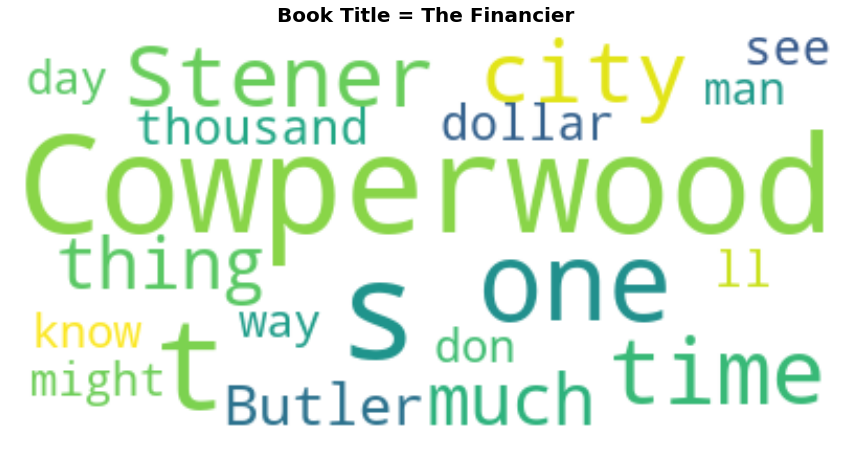

In [114]:
#creating wordcloud for chosen book
fig, ax = plt.subplots(figsize = (15, 10))
word_cloud = WordCloud(collocations = False, max_words=20, background_color = 'white').generate(text)
ax.imshow(word_cloud, interpolation='bilinear')
ax.axis("off")
ax.set_title('Book Title = The Financier', fontsize=20, weight='bold')
fig.show()



Figure 1 above created a word cloud after text was preproccssed from the gutenberg website accessing free e-books. Figure 1 plots the top 20 most frequent words in the book after extensive pre-processing of the text was carried out.

# **Part 2 -- word cloud creation from Wikipedia after webscraping**

In [115]:
session = HTMLSession()
url = 'https://en.wikipedia.org/wiki/Republican_Party_(United_States)'
response = session.get(url)
response

<Response [200]>

In [116]:
# creating a variable text that pulls all of the text from the wikipedia page using the attribute from the response variable created in the cell prior 
text = response.text
text

'<!DOCTYPE html>\n<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-language-alert-in-sidebar-enabled vector-feature-sticky-header-disabled vector-feature-page-tools-disabled vector-feature-page-tools-pinned-disabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-enabled vector-feature-limited-width-content-enabled" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8"/>\n<title>Republican Party (United States) - Wikipedia</title>\n<script>document.documentElement.className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-language-alert-in-sidebar-enabled vector-feature-sticky-header-disabled vector-feature-page-tools-disabled vector-feature-page-tools-pinned-disabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-enabled vector-feature-limited-width-content-enabled";(function(){var cooki

In [117]:
# text pre-processing 
##removing numbers
def remove_num(text):
    text = ''.join([i for i in text if not i.isdigit()])
    return text

#executing function
text = np.vectorize(remove_num)(text)


#removing punctuation
from string import punctuation
def remove_punct(text):
    text = ' '.join(word.strip(punctuation) for word in text.split() if word.strip(punctuation))
    return text

#executing function
text = np.vectorize(remove_punct)(text)



#removing other characters
def remove_u(text):
    text = text.replace('_','')
    text = text.replace('?','')
    text = text.replace('•','')
    text = text.replace("@",'')
    text = text.replace('▯','')
    text = text.replace("'",'')
    text = text.replace(",","")
    return text

#executing function
text = np.vectorize(remove_u)(text)


#removing extra spaces
def remove_extra_space(text):
    word_list = text.split()
    text = ' '.join(word_list)
    return text

#executing function
text = np.vectorize(remove_extra_space)(text)



#removing very common words
#reference: https://gist.github.com/sebleier/554280
stop_words = ["i", "I", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself", "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself", "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an", "the","Mr", "and", "but", "if", "or", "because", "as", "until", "while", "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before", "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again", "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each", "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than", "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"]
def remove_stopwords(text):
    word_list = text.split()
    word_list = [word for word in word_list if word not in stop_words]
    text = ' '.join(word_list)
    return text

#executing function
text = np.vectorize(remove_stopwords)(text)
text = text.tolist()
print(text)


DOCTYPE html html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-language-alert-in-sidebar-enabled vector-feature-sticky-header-disabled vector-feature-page-tools-disabled vector-feature-page-tools-pinned-disabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-enabled vector-feature-limited-width-content-enabled lang="en dir="ltr head meta charset="UTF title>Republican Party United States Wikipedia</title script>document.documentElement.className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-language-alert-in-sidebar-enabled vector-feature-sticky-header-disabled vector-feature-page-tools-disabled vector-feature-page-tools-pinned-disabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-enabled vector-feature-limited-width-content-enabled";(function(){var cookie=document.cookie.match enwik

In [118]:
# converting the text object to string 
text = str(text)
type(text)

str

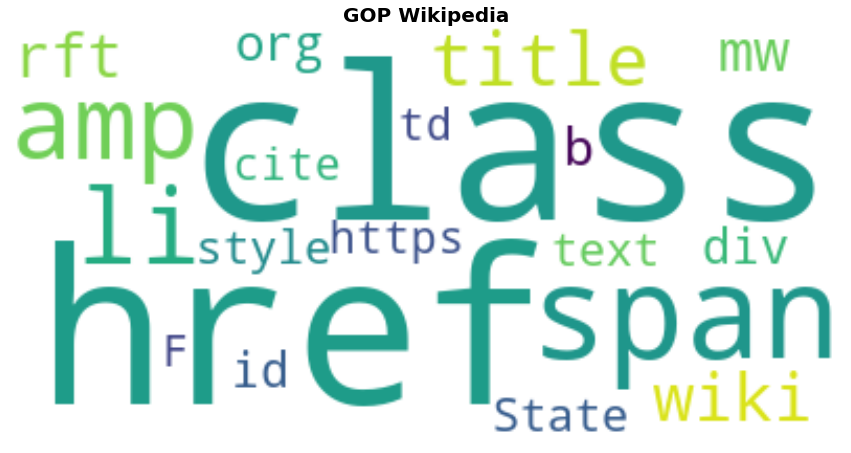

In [119]:
#creating wordcloud for Wikipedia page 
fig, ax = plt.subplots(figsize = (15, 10))
word_cloud = WordCloud(collocations = False, max_words=20, background_color = 'white').generate(text)
ax.imshow(word_cloud, interpolation='bilinear')
ax.axis("off")
ax.set_title('GOP Wikipedia', fontsize=20, weight='bold')
fig.show()

Figure 2 above presents a word cloud from the GOP Wikipedia page. There are a bunch of words associated with HTML code that should not be included in this word cloud. This was a rudimentary analysis that was carried out while utilizing web scraping. 